Name : Sanjana V Herur 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

=> 3168 records and 21 columns/attributes

In [4]:
# 1)
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

=> NO NULL VALUES

In [5]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

-> label -> object 
=> Classification Problem where 'label' is a dependent variable and rest of the attributes are independent varibles

In [6]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

Two Categorical values possible ; male or female

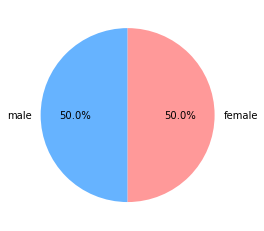

In [7]:
# 2) pie chart

p=df['label'].value_counts()
plt.pie(p, labels=['male','female'], startangle=90, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.show()

In [8]:
# 3) Splittig of records into train and test data

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
'''
# Verification
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))
x.head()
y.head()
'''
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2534, 20)
(2534,)
(634, 20)
(634,)


In [9]:
# 5) 

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def gen_metrics(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix :-\n',cm)
    print('\nClassification Report :-\n',classification_report(ytest,ypred))
    print('\nAccuracy Score : ',accuracy_score(ytest,ypred))

def train_test_score(m):
    print('\nTraining Score :', m.score(x_train,y_train))
    print('Testing Score/Accuracy Score :',m.score(x_test,y_test),'\n')
    

In [10]:
# 4)

### a) DECISION TREE CLASSIFIER

In [33]:
from sklearn.tree import DecisionTreeClassifier

m1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_split = 20)
m1.fit(x_train,y_train)

ypred_m1 = m1.predict(x_test)
df1 = pd.DataFrame({'y_test':y_test,'ypred_m1':ypred_m1})
df1.head()

,y_test,ypred_m1
674,male,male
562,male,male
3070,female,female
2023,female,female
2710,female,male


In [34]:
gen_metrics(y_test,ypred_m1)
train_test_score(m1)

Confusion Matrix :-
 [[324  11]
 [  8 291]]

Classification Report :-
               precision    recall  f1-score   support

      female       0.98      0.97      0.97       335
        male       0.96      0.97      0.97       299

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634


Accuracy Score :  0.9700315457413249

Training Score : 0.9818468823993686
Testing Score/Accuracy Score : 0.9700315457413249 



### b) RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.ensemble import RandomForestClassifier

m2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy',max_depth = 8, min_samples_split = 10)
m2.fit(x_train,y_train)

ypred_m2 = m2.predict(x_test)
df2 = pd.DataFrame({'y_test':y_test,'ypred_m2':ypred_m2})
df2.head()

,y_test,ypred_m2
674,male,male
562,male,male
3070,female,female
2023,female,female
2710,female,female


In [44]:
gen_metrics(y_test,ypred_m2)
train_test_score(m2)

Confusion Matrix :-
 [[329   6]
 [  4 295]]

Classification Report :-
               precision    recall  f1-score   support

      female       0.99      0.98      0.99       335
        male       0.98      0.99      0.98       299

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


Accuracy Score :  0.9842271293375394

Training Score : 0.9960536700868192
Testing Score/Accuracy Score : 0.9842271293375394 



### c) KNN CLASSIFIER

Maximum accuracy : 0.7429022082018928 at K = 6


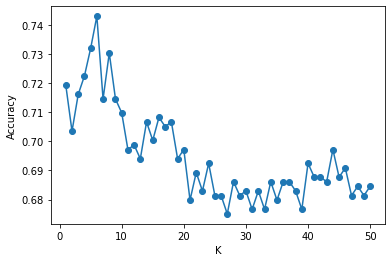

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# way to find k randomly ; k = sqrt(n) = sqrt(2534) = 51

# One way to find k for max accuracy is by ploting graph having diff k values and its corresponding acc values

acc = []
for i in range(1,51):
    test_m = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    ytest_m = test_m.predict(x_test)
    acc.append(accuracy_score(y_test,ytest_m))
    
plt.plot(range(1,51),acc,marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy :",max(acc),"at K =",(acc.index(max(acc))+1))


In [16]:
m3 = KNeighborsClassifier(n_neighbors = 7)
m3.fit(x_train,y_train)

ypred_m3 = m3.predict(x_test)
df3 = pd.DataFrame({'y_test':y_test,'ypred_m3':ypred_m3})
df3.tail()

,y_test,ypred_m3
706,male,male
583,male,male
2981,female,male
1214,male,female
1300,male,male


In [17]:
gen_metrics(y_test,ypred_m3)
train_test_score(m3)

Confusion Matrix :-
 [[228 107]
 [ 74 225]]

Classification Report :-
               precision    recall  f1-score   support

      female       0.75      0.68      0.72       335
        male       0.68      0.75      0.71       299

    accuracy                           0.71       634
   macro avg       0.72      0.72      0.71       634
weighted avg       0.72      0.71      0.71       634


Accuracy Score :  0.7145110410094637

Training Score : 0.7865035516969219
Testing Score/Accuracy Score : 0.7145110410094637 



### d) LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression

m4 = LogisticRegression()
m4.fit(x_train,y_train)

ypred_m4 = m4.predict(x_test)
df4 = pd.DataFrame({'y_test':y_test,'ypred_m4':ypred_m4})
df4.head()

C:\Users\vijay kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_test,ypred_m4
674,male,male
562,male,male
3070,female,female
2023,female,female
2710,female,male


In [19]:
gen_metrics(y_test,ypred_m4)
train_test_score(m4)

Confusion Matrix :-
 [[281  54]
 [  9 290]]

Classification Report :-
               precision    recall  f1-score   support

      female       0.97      0.84      0.90       335
        male       0.84      0.97      0.90       299

    accuracy                           0.90       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634


Accuracy Score :  0.9006309148264984

Training Score : 0.904104183109708
Testing Score/Accuracy Score : 0.9006309148264984 



### e) SVM CLASSIFIER

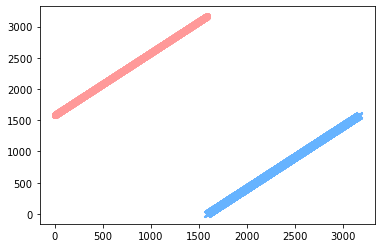

In [20]:
# Check if dataset is 2-class linearly separable or not 
f=[]
m=[]
for i in range(0,3167): 
    if(df.label[i]=='male'):
        m.append(i)
    else:
        f.append(i)
plt.scatter(range(0,1583), f, color='#ff9999', marker='o')
plt.scatter(range(1583,3167), m, color='#66b3ff', marker='x')

=> It is linearly separable.

In [21]:
from sklearn.svm import SVC

m5 = SVC(kernel='linear',C=1)
m5.fit(x_train,y_train)

ypred_m5 = m5.predict(x_test)
df5 = pd.DataFrame({'y_test':y_test,'ypred_m5':ypred_m5})
df5.head()

,y_test,ypred_m5
674,male,male
562,male,male
3070,female,female
2023,female,female
2710,female,male


In [22]:
gen_metrics(y_test,ypred_m5)
train_test_score(m5)

Confusion Matrix :-
 [[288  47]
 [  5 294]]

Classification Report :-
               precision    recall  f1-score   support

      female       0.98      0.86      0.92       335
        male       0.86      0.98      0.92       299

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634


Accuracy Score :  0.917981072555205

Training Score : 0.9187056037884768
Testing Score/Accuracy Score : 0.917981072555205 



In [23]:
# 6)

#### The model with best accuracy ,when compared, for the given dataset is :
Random Forest Classifier with accuracy percentage score of 98.4% 


### Thank You